In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import AgglomerativeClustering as AC

from sklearn.cluster import DBSCAN as DB
from sklearn.neighbors import NearestNeighbors as NN

from sklearn.cluster import KMeans as KM

from sklearn.datasets import load_iris

In [2]:
def GetColors(N, cmap_name = 'rainbow'):
    from matplotlib.cm import get_cmap
    import numpy as np
    
    cmap = get_cmap(cmap_name)
    n = np.linspace(0,1,N)
    
    return cmap(n)

def PlotGroups(points, labels, colors):
    """ Inputs: 
            points: The array of points to plot
            labels: A list or array containing the label for each point
            colors: An array of colors, 1 per unique value in 'labels'
    """
    import matplotlib.pyplot as plt
    
    plt.figure(figsize = (6,6))
    for i, yi in enumerate(np.unique(labels)):
        idx = (labels == yi)
        plt.scatter(points[idx,0], points[idx,1], 
                    color = colors[i], 
                    alpha=0.5,
                    ec = 'k', 
                    label = yi)
    plt.legend(bbox_to_anchor=[1,0.5], loc = 'center left')
    
    return

def CompareClasses(actual, predicted, names=None):
    classes = pd.DataFrame(columns=['Actual','Predicted'])
    classes['Predicted'] = predicted
    classes['Actual'] = actual
    conf_mat = pd.crosstab(index=classes['Actual'],
                           columns=classes['Predicted'])
    
    if names is not None: 
        conf_mat.columns = names
        conf_mat.index = names
    conf_mat.columns.name = 'Predicted'
    conf_mat.index.name = 'Actual'
    
    accuracy = sum(predicted==actual)/len(actual) #sums boolean t/f 
    return conf_mat, accuracy

def plot_dendrogram(model, truncate_at_n_clusters=None):
    '''Function modified from: 
       https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html'''
    
    from scipy.cluster.hierarchy import dendrogram
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    if truncate_at_n_clusters is not None:
        dendrogram(linkage_matrix,truncate_mode='level', p=truncate_at_n_clusters)
    else:
        dendrogram(linkage_matrix)
    plt.ylabel('"Distance"\n(depends on linkage type used)')
    
def KDistPlot(data,k): 
    from sklearn.neighbors import NearestNeighbors as NN
    import matplotlib.pyplot as plt
    
    nn = NN(n_neighbors=k)
    nn.fit(data)
    distances,_ = nn.kneighbors(data)
    
    kth_distance = distances[:,-1] 
    kth_distance.sort()
    
    plt.figure(figsize=(12,6))
    plt.plot(kth_distance[::-1],'-.') #[::-1] reverses array
    plt.xlabel('Data points')
    plt.ylabel('Distance to ' + str(k)+'th nearest neighbor')
    plt.show()
    
    return

In [3]:
X_df,y_df = load_iris(return_X_y=True, as_frame=True)
X = load_iris().data
y = load_iris().target
y_names = load_iris().target_names

## 4) Number of data points, classifications

In [4]:
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y_df.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

## 5) AC with with n_clusters = 3

## unstandardized

In [6]:
ac = AC(n_clusters=3)
y_pred = ac.fit_predict(X)

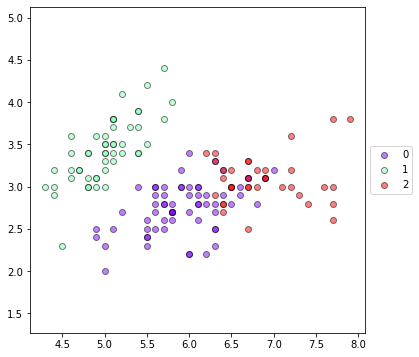

In [7]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(X,y_pred,colors)
plt.axis('equal')
plt.show()

In [8]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,0,1,2
Actual,,,
0,0,50,0
1,49,0,1
2,15,0,35


In [9]:
y_pred_adj = y_pred.copy()
idx0 = y_pred == 0 
idx1 = y_pred == 1 
idx2 = y_pred == 2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

In [10]:
cm, acc = CompareClasses(y,y_pred_adj)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,49,1
2,0,15,35


In [11]:
acc

0.8933333333333333

## standardized

In [12]:
ss=SS()
Xs=ss.fit_transform(X)

ac = AC(n_clusters=3)
y_pred = ac.fit_predict(Xs)

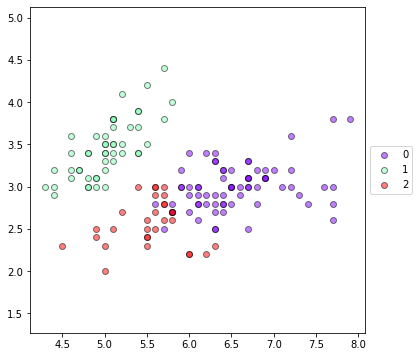

In [13]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(X,y_pred,colors)
plt.axis('equal')
plt.show()

In [14]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,0,1,2
Actual,,,
0,0,49,1
1,23,0,27
2,48,0,2


In [15]:
y_pred_adj = y_pred.copy()
idx0 = y_pred == 0 
idx1 = y_pred == 1 
idx2 = y_pred == 2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 2
y_pred_adj[idx2] = 0

In [16]:
cm, acc = CompareClasses(y,y_pred_adj)
cm

Predicted,0,1,2
Actual,,,
0,1,0,49
1,27,23,0
2,2,48,0


## 6) AC with n_clusters=3 AFTER PCA

### unstandardized

In [17]:
pca = PCA(n_components = 2, random_state=146)
X_pca = pca.fit_transform(X)

ac = AC(n_clusters=3)
y_pred = ac.fit_predict(X_pca)

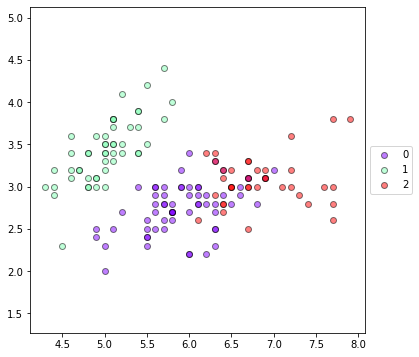

In [18]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(X,y_pred,colors)
plt.axis('equal')
plt.show()

In [19]:
y_pred_adj = y_pred.copy()
idx0 = y_pred == 0 
idx1 = y_pred == 1 
idx2 = y_pred == 2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

In [20]:
cm, acc = CompareClasses(y,y_pred_adj)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,49,1
2,0,14,36


## standardized

In [21]:
pca = PCA(n_components = 2, random_state=146)
Xs_pca = pca.fit_transform(Xs)

ac = AC(n_clusters=3)
y_pred = ac.fit_predict(Xs_pca)

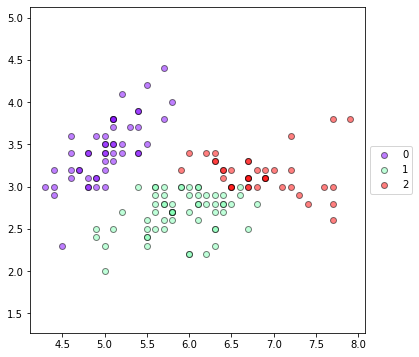

In [22]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(X,y_pred,colors)
plt.axis('equal')
plt.show()

In [23]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,41,9
2,0,20,30


## 7) AC with n_clusters=3 AFTER tSNE (standardized)

## unstandardized

In [24]:
tsne = TSNE(random_state=146)
X_tsne = tsne.fit_transform(X)

ac = AC(n_clusters=3)
y_pred = ac.fit_predict(X_tsne)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


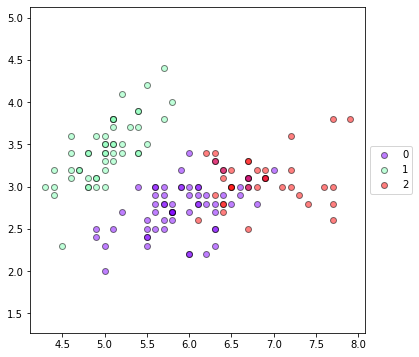

In [25]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(X,y_pred,colors)
plt.axis('equal')
plt.show()

In [26]:
y_pred_adj = y_pred.copy()
idx0 = y_pred == 0 
idx1 = y_pred == 1 
idx2 = y_pred == 2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

In [27]:
cm, acc = CompareClasses(y,y_pred_adj)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,50,0
2,0,14,36


In [28]:
acc

0.9066666666666666

## standardized

In [29]:
tsne = TSNE(random_state=146)
Xs_tsne = tsne.fit_transform(Xs)

ac = AC(n_clusters=3)
y_pred = ac.fit_predict(Xs_tsne)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


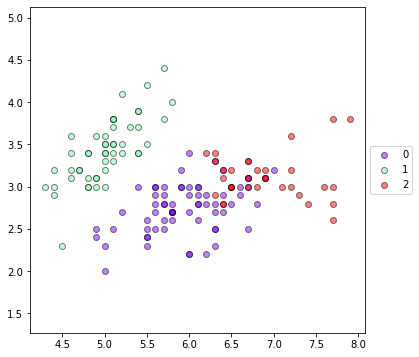

In [30]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(X,y_pred,colors)
plt.axis('equal')
plt.show()

In [31]:
y_pred_adj = y_pred.copy()
idx0 = y_pred == 0 
idx1 = y_pred == 1 
idx2 = y_pred == 2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

In [32]:
cm, acc = CompareClasses(y,y_pred_adj)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,50,0
2,0,17,33


# 8) Comparing Results

AHC on X: 16 misclassified

		
AHC on Xs: 26 or 30 misclassified

		
AHC on PCA(X): 15 misclassified

		
AHC on PCA(Xs): 29 misclassified

		
AHC on TSNE(X): 14 misclassified

		
AHC on TSNE(Xs): 17 misclassified

# 9) K-means 

## Unstandardized

In [33]:
k = 3
km = KM(n_clusters=k,random_state=146)
y_pred = km.fit_predict(X)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
cm, acc = CompareClasses(y,y_pred)

In [35]:
cm

Predicted,0,1,2
Actual,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [36]:
y_pred_adj = y_pred.copy()
idx0 = y_pred == 0 
idx1 = y_pred == 1 
idx2 = y_pred == 2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

In [37]:
cm, acc = CompareClasses(y,y_pred_adj)

In [38]:
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [39]:
acc

0.8933333333333333

## Standardized

In [40]:
k = 3
km = KM(n_clusters=k,random_state=146)
y_pred = km.fit_predict(Xs)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,39,11
2,0,14,36


## PCA (unstandardized)

In [42]:
km = KM(n_clusters=k,random_state=146)
y_pred = km.fit_predict(X_pca)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,0,1,2
Actual,,,
0,0,0,50
1,47,3,0
2,14,36,0


## PCA (standardized)

In [44]:
km = KM(n_clusters=k,random_state=146)
y_pred = km.fit_predict(Xs_pca)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,0,1,2
Actual,,,
0,0,0,50
1,39,11,0
2,14,36,0


## tSNE (unstandardized)

In [46]:
km = KM(n_clusters=3,random_state=146)
y_pred = km.fit_predict(X_tsne)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,49,1
2,0,12,38


In [48]:
acc

0.9133333333333333

## tSNE (standardized)

In [49]:
km = KM(n_clusters=k,random_state=146)
y_pred = km.fit_predict(Xs_tsne)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,0,1,2
Actual,,,
0,0,50,0
1,38,0,12
2,12,0,38


In [51]:
y_pred_adj = y_pred.copy()
idx0 = y_pred == 0 
idx1 = y_pred == 1 
idx2 = y_pred == 2

y_pred_adj[idx0] = 1
y_pred_adj[idx1] = 0
y_pred_adj[idx2] = 2

In [52]:
cm, acc = CompareClasses(y,y_pred_adj)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,38,12
2,0,12,38


## Compare results

KM(X): 16 misclassified

KM(Xs): 25 misclassified

KM(X_pca): 17 misclassified

KM(Xs_pca): 25 misclassified

KM(X_tsne): 13 misclassified

KM (Xs_tsne): 24 misclassified

# 12) DBSCAN (unstandardized)

In [53]:
db = DB(eps=1, min_samples=4)
y_pred = db.fit_predict(X)

In [54]:
cm, acc = CompareClasses(y,y_pred_adj)
cm

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,38,12
2,0,12,38


# 13) 

In [55]:
db = DB(eps=1.25, min_samples=4)
y_pred = db.fit_predict(X_tsne)

In [56]:
cm, acc = CompareClasses(y,y_pred)
cm

Predicted,-1,0,1,2
Actual,,,,
0,0,50,0,0
1,2,0,48,0
2,0,0,15,35


In [57]:
#y_.shape

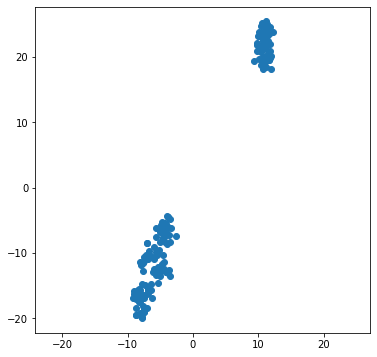

In [58]:
colors = GetColors(len(np.unique(y_pred)))
plt.figure(figsize=(6,6))
plt.scatter(X_tsne[:,0],X_tsne[:,1])
plt.axis('equal')
plt.show()

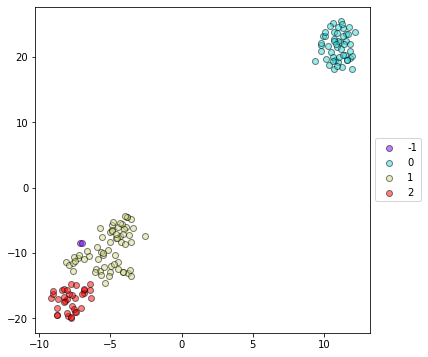

In [59]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(X_tsne,y_pred,colors)

In [60]:
y == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

In [61]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [62]:
import sklearn
sklearn.__version__

'1.1.1'

In [63]:
ht = pd.read_csv('Data/HiddenTreasure.csv', encoding = 'UTF8')
ht

,x1,x2,x3,x4
0,9.954630,-22.443733,37.518953,13.916940
1,5.157254,-14.647584,22.737570,10.927051
2,-0.534579,-27.550048,26.225981,17.120170
3,11.877725,-23.998535,32.812487,21.106308
4,7.037385,-18.648310,19.221472,17.172442
...,...,...,...,...
4995,2.653792,-14.393382,25.479759,16.907078
4996,2.968083,-26.635565,20.802994,17.593503
4997,6.693500,-23.291161,35.931378,8.053090
4998,7.250875,-27.294855,19.745863,17.022313


In [65]:
ss = SS()
ht_s = ss.fit_transform(ht)

In [66]:
pd.DataFrame(ht_s)

,0,1,2,3
0,0.544127,-0.024373,1.910657,0.000976
1,-0.400488,1.541654,-1.047755,-0.604001
2,-1.521224,-1.050088,-0.349569,0.649122
3,0.922789,-0.336689,0.968684,1.455681
4,-0.030286,0.738021,-1.751483,0.659698
...,...,...,...,...
4995,-0.893426,1.592716,-0.498921,0.606004
4996,-0.831542,-0.866394,-1.434950,0.744896
4997,-0.097998,-0.194597,1.592912,-1.185522
4998,0.011751,-0.998827,-1.646529,0.629321


In [68]:
pca = PCA(random_state=146)
hts_pca = pca.fit_transform(ht_s)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize = (12,12))
plt.scatter(hts_pca[:,0], hts_pca[:,1], alpha=0.5, ec = 'k')
plt.show()

In [ ]:
tsne = TSNE(perplexity=50)
hts_tsne = tsne.fit_transform(ht_s)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(hts_tsne[:,0],hts_tsne[:,1],alpha=0.5,ec='k')
#plt.axis('equal')
plt.show()

In [113]:
ac = AC(n_clusters=None,distance_threshold=0)
ac.fit(ht_s)
y_pred = ac.fit_predict(ht_s)

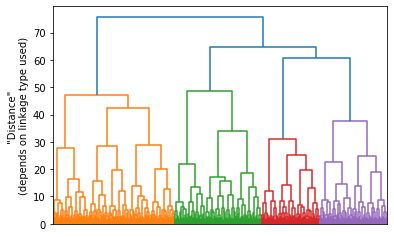

In [114]:
plot_dendrogram(ac)
plt.xticks([])
plt.show()

In [127]:
ac = AC(distance_threshold=None,n_clusters=2,linkage='single')
y_pred = ac.fit_predict(ht_s)

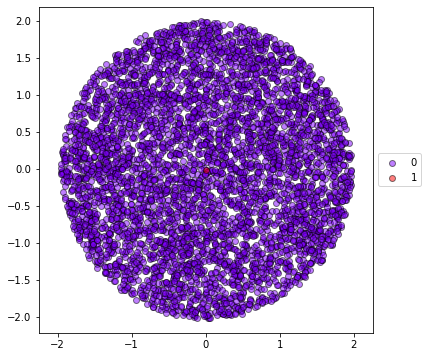

In [128]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(ht_s,y_pred,colors)
plt.axis('equal')
plt.show()

In [129]:
y_pred.nonzero()

(array([357], dtype=int64),)

In [72]:
m = 5

nn = NN(n_neighbors=m)
nn.fit(ht_s)

distances,_ = nn.kneighbors(hts_pca)

In [73]:
kth_distance = distances[:,-1] #last column in array
kth_distance.sort()

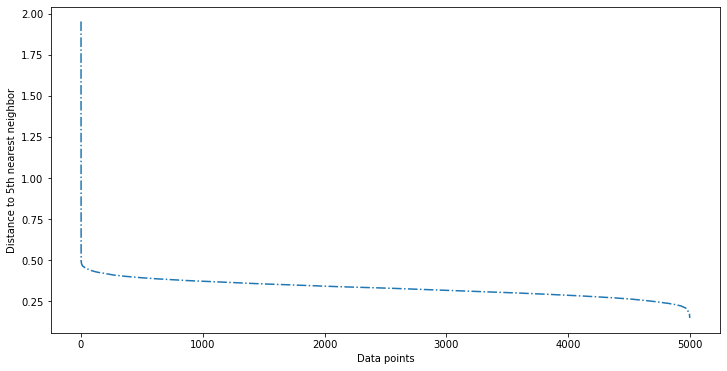

In [74]:
plt.figure(figsize=(12,6))
plt.plot(kth_distance[::-1],'-.') #[::-1] reverses array
plt.xlabel('Data points')
plt.ylabel('Distance to ' + str(m)+'th nearest neighbor')
plt.show()

In [105]:
db = DB(eps=5, min_samples=5)
y_pred = db.fit_predict(ht)

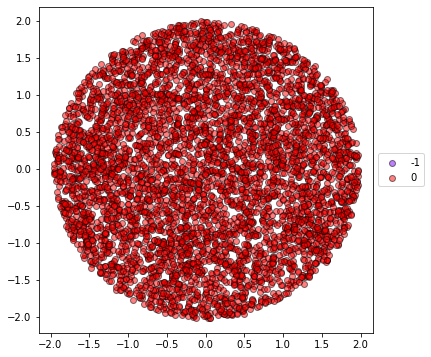

In [112]:
colors = GetColors(len(np.unique(y_pred)))
PlotGroups(ht_s,y_pred,colors)

In [92]:
arr = pd.DataFrame(y_pred)
arr

,0
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [107]:
y_pred[np.nonzero(y_pred)]

array([-1], dtype=int64)

In [108]:
y_pred.nonzero()

(array([357], dtype=int64),)

In [110]:
ht.iloc[357]

x1     7.239648
x2   -22.403810
x3    27.894648
x4    13.911870
Name: 357, dtype: float64